In [2]:
from insight_analyzer import *


analyzer = AnomalyAnalyzer(insight_id="657f0cc8-fa05-46bb-9808-8cf4f065ce3d")

df = analyzer.get_df()

Ok, first we want to validate the data, if we can run the anomaly scan on it.

In [3]:
data = df[df.columns[0]]
validate_series(data)

TIMESTAMP.hour
2013-07-28 00:00:00    72.14
2013-07-28 01:00:00    72.76
2013-07-28 02:00:00      NaN
2013-07-28 03:00:00    72.78
2013-07-28 04:00:00    71.89
                       ...  
2013-09-27 08:00:00    74.96
2013-09-27 09:00:00    76.26
2013-09-27 10:00:00    75.03
2013-09-27 11:00:00    75.98
2013-09-27 12:00:00    74.71
Freq: H, Name: AMBIENT_TEMPERATURE.TEMPERATURE, Length: 1477, dtype: float64

Everything seems fine, let's detect the anomalies. Here we want to set up the sensitivity. The lower, the more sensitive the detector will be.

In [4]:
sensitivity = 1
seasonal_ad = PersistAD(c=sensitivity, side="both")
anomalies = seasonal_ad.fit_detect(data)

Now let's plot it, so we can see it!

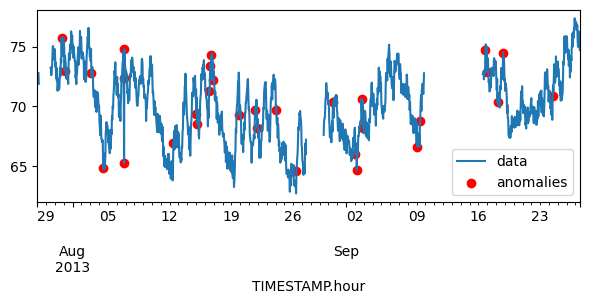

In [5]:
fig, ax = plt.subplots(figsize=(7, 2.5))
data.plot(ax=ax, label="data")
anomalies = anomalies.fillna(False)

# Filter the data using the anomalies binary mask to get the anomaly values.
anomaly_values = data[anomalies]

# Use scatter to plot the anomalies as points.
ax.scatter(anomaly_values.index, anomaly_values, color="red", label="anomalies")

ax.legend()

That is meaby a bit too sensitive, let's tone it down a little

In [6]:
sensitivity = 1.5
seasonal_ad = PersistAD(c=sensitivity, side="both")
anomalies = seasonal_ad.fit_detect(data)

Let's see now!

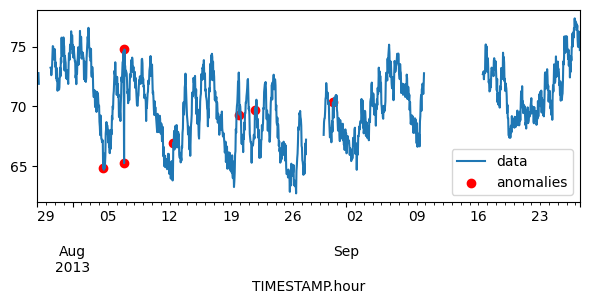

In [7]:
fig, ax = plt.subplots(figsize=(7, 2.5))
data.plot(ax=ax, label="data")
anomalies = anomalies.fillna(False)

# Filter the data using the anomalies binary mask to get the anomaly values.
anomaly_values = data[anomalies]

# Use scatter to plot the anomalies as points.
ax.scatter(anomaly_values.index, anomaly_values, color="red", label="anomalies")

ax.legend()

That looks much better, now let's push to it the server, so we can see it in our dashboard

In [8]:
analyzer.push_to_server()